### Interfaz Gráfica

#### Autor: Mario de la Parte Izquierdo 
#### Fecha: 30/05/2019

In [58]:
from tkinter import * # Carga módulo tk (widgets estándar) para poder crear interfaz de una aplicación
from tkinter import messagebox
from tkinter import filedialog
from tkinter import ttk

import tkinter as tk


import os, sys, subprocess
from PyQt5.QtWidgets import QFileDialog
import pandas as pd
import matplotlib.pyplot as plt

import sqlite3 # Biblioteca para la creación de la BBDD

import math # Librería para comprobar si un dato es "nan" o no

#from algoritmo.ipynb import getS 
import re # Regular Expressions

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
from matplotlib.figure import Figure

In [59]:
# algoritmo.ipynb
def algoritmo(nombreFichero):
    f = open(nombreFichero,"r") # Se abre el fichero original corrupto [r: read(estamos abriendo un archivo para leerlo)].
    a = f.read() 
    f.close()
    
    quitarExtension = nombreFichero.split('.')[-2] # Se divide el nombre del fichero en 2 partes(antes del "." y después) y se coge la parte de antes(nombre del fichero seleccionado sin extensión)
    nombreDelArchivoFinal = quitarExtension + ".csv" # Variable global que recoge el nombre del archivo .csv que se va a crear.
    archivo = open(nombreDelArchivoFinal ,"w")  # 1. Se crear el fichero (.csv)

    posicion = 0
    lista_num_ceros_fila_siguiente = []
    filaMergeDownMayorQueCero = False
    filaEspecial = False
    flag = True
    Responsable = False
    Plan = ""
    hacerUnaVezSolo = True
    contadorFila = 0


    datos = re.findall("<Row>(.+?)</Row>", a) # Se obtiene toda la información de cada fila del Excel (ROW)

    for i, fila in enumerate(datos): # Se recorre cada fila
        #print(i)
        #print(fila)
        #print("\n")
        # Conclusión: Hay que tratar 21 filas    
        cell = re.findall("<Cell(.+?)</Cell>", fila) # CELL (es una lista de strings)


        #print("(inicio)--------------------------")
        #print(cell)
        #print("contadorFila = "+ str(contadorFila) +"--------------------------(fin)")
        contadorFila +=1

        #@
        primeraCeldaDeLaFilaEsNumDe4Dig = False

        for i, celd in enumerate(cell): 
            data = re.findall("<Data(.+?)>(.+?)</Data>", celd)
            #print(data)
            if (len(data) >0 ):
                if ( (i == 0) and (len(data[0][1]) == 4) and (data[0][1] != "Rep.")):  # and (type(data[0][1]) == int)
                    #print("Longitud de 4") 
                    #print("len de data: "+str(len(data[0][1])))
                    primeraCeldaDeLaFilaEsNumDe4Dig = True

            if(len(data)>0):
                Plan234 = data[0][1]  # Variable para      
                if (  len(data[0][1] ) > 30 and  Plan234.find("Plan") == 0 ):
                    Plan = data[0][1] # Se almacena el plan a introducir 

        #@

        if ( contadorFila <= 6 or primeraCeldaDeLaFilaEsNumDe4Dig == True ): # Si cumple estas condiciones, se añade al csv final.
            #print("************************************************************************")
            #print("Fila número "+str(contadorFila))

            for j, celda in enumerate(cell):
                step_0 = celda.split(' ss:MergeDown="')  # Se saca MergeDown y  MergeAcross de cada celda
                step_1 = step_0[1].split('" ss:MergeAcross="')
                step_2 = step_1[1].split('"')
                #print("MergeDown:")
                #print(step_1[0])
                MergeDown = step_1[0] 
                #print("MergeAcross:")
                #print(step_2[0])
                MergeAcross = step_2[0]

                # Se rellena la lista_num_ceros_fila_siguiente 
                if(int(MergeDown) > 0):
                    filaMergeDownMayorQueCero = True
                if (filaMergeDownMayorQueCero == True):
                    lista_num_ceros_fila_siguiente.append(int(MergeDown)) # Para añadir MergeDown a la lista sea 1 o 0.
                    if(int(MergeAcross) > 0):
                        aux = int(MergeAcross)
                        while (aux > 0):
                            lista_num_ceros_fila_siguiente.append(0) # Para añadir un cero en caso de que haya celdas en blanco
                            aux -= 1

                if (filaEspecial == True and hacerUnaVezSolo == True): # Meter info de lista_num_ceros_fila_siguiente [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1]
                    #print("filaEspecial activado")

                    #if (len(lista_num_ceros_fila_siguiente) >= posicion):# Para limpiar la lista en caso de que haya 2 titulaciones en el mismo Excel.
                        #lista_num_ceros_fila_siguiente = []
                        #posicion = 0
                    #print(len(lista_num_ceros_fila_siguiente))
                    while (posicion < len(lista_num_ceros_fila_siguiente)   and flag == True):
                        #if (hacerUnaVezSolo == True):
                            if (lista_num_ceros_fila_siguiente[posicion] == 1): # Hay un 1 en la lisya -> meter ; 
                                #print("mete celda en blanco")
                                archivo.write(";")
                            else:                                           # Hay un 0 en la lisya -> meter datos 
                                flag = False
                                #print("mete datos")
                                data = re.findall("<Data(.+?)>(.+?)</Data>", celda) # DATA 
                                #print(data)
                                if(len(data)>0):
                                    if ( type(data[0][1]) != int ): # Si no es un entero, se entrecomilla
                                        #archivo.write('"') # Se añaden comillas para que se posteriormente se pueda abrir el .csv sin problemas por lasa tildes
                                        archivo.write(data[0][1])
                                        #archivo.write('"') # Se añaden comillas para que se posteriormente se pueda abrir el .csv sin problemas por lasa tildes
                                        archivo.write(";")
                                    else:  # si es un entero, no se entrecomilla
                                        #print("es un entero") # Aqui no entra nunca 
                                        archivo.write(data[0][1])
                                        archivo.write(";") # Siguiente columna
                                    num = int(MergeAcross)
                                    while(num > 0):            
                                        archivo.write(";")
                                        num -= 1
                                else: 
                                    archivo.write(";")
                            posicion += 1  
                    #hacerUnaVezSolo = False        
                else:   # Caso Normal         
                    # Sacar contenido de la celda (DATA)
                    data = re.findall("<Data(.+?)>(.+?)</Data>", celda) # DATA 
                    if(len(data)>0):
                        #print(data[0][1])

                        #if (variable.find("Plan "+[0-9]) < 0):
                        Plan234 = data[0][1]  # Variable para      
                        if (  len(data[0][1] ) > 30 and  Plan234.find("Plan") == 0 ):
                            #print("la cadena anterior es larga y empieza por plan___________________________________________________")
                            Plan = data[0][1] # Se almacena el plan a introducir 

                        if ( str(data[0][1]) == "Responsable" ):
                            Responsable = True
                            #print("Después de este habría que meter la nueva columna")


                        if ( type(data[0][1]) != int ): # Si no es un entero, se entrecomilla
                            #archivo.write('"') # Se añaden comillas para que se posteriormente se pueda abrir el .csv sin problemas por lasa tildes
                            archivo.write(data[0][1])
                            #archivo.write('"') # Se añaden comillas para que se posteriormente se pueda abrir el .csv sin problemas por lasa tildes
                            archivo.write(";") # Siguiente columna
                        else:  # si es un entero, no se entrecomilla
                            #print("es un entero") # Aqui no entra nunca 
                            archivo.write(data[0][1])
                            archivo.write(";") # Siguiente columna
                        num = int(MergeAcross)
                        while(num > 0):            
                            archivo.write(";")
                            num -= 1
                    else: # Es una celda en blanco (en data hay [])
                        #print("EN BLANCO")
                        archivo.write(";")

                flag = True

            #print(lista_num_ceros_fila_siguiente)
            # Fin del 2do for que recorre cada fila.
            #print("\n") # Por cada cacho del sublime (21 en total)

            if (filaEspecial == True and hacerUnaVezSolo == True):
                while (posicion < len(lista_num_ceros_fila_siguiente) ):
                    archivo.write(";") 
                    posicion += 1 
                archivo.write(";") # Se añade otra celda en blanco (la celda de debajo de la nueva columna "Plan")
                hacerUnaVezSolo = False 

            #(Antes de hacer el \n de "Responsable")
            if (Responsable == True): # Para insertar la nueva columna llamada "Plan"
                #archivo.write('"') 
                archivo.write("Plan")
                #archivo.write('"') 
                archivo.write(";") 
                Responsable = False

                
            if (contadorFila == 1): # Para solucionar problema con la obtención del año en la lectura del (.csv)
                archivo.write(";;;;;;")
                
            if(contadorFila > 6): # Se introduce la info relevante a la nueva columna "Plan" añadida
                archivo.write(Plan)
                archivo.write(";")
                archivo.write("\n") 
            else: 
                archivo.write("\n") # Siguiente Fila.

            filaEspecial = False
            if(filaMergeDownMayorQueCero == True):
                filaEspecial = True
            filaMergeDownMayorQueCero = False

    archivo.close()



Has establecido en variable global temporadaG1 :  2019/20-0
Has establecido en variable global cursoG1 :  2
Has establecido en variable global planG1 :  Plan 163 - GRADO EN INGENIERÍA INFORMÁTICA
Visualizar G1 con :
2019/20-0
Plan 163 - GRADO EN INGENIERÍA INFORMÁTICA
2


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\mdmar\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-60-7b2c7b898d90>", line 107, in visualizarG1
    canvas = FigureCanvasTkAgg(g1, mater = raiz2)
NameError: name 'raiz2' is not defined


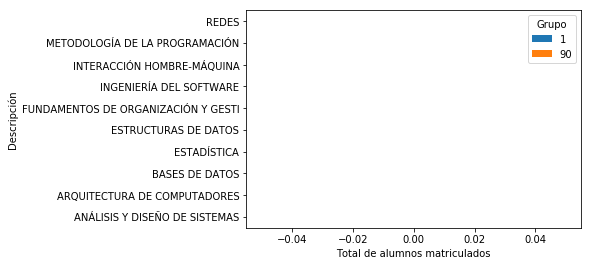

In [60]:
raiz = Tk() #Se crea el Framework o raiz principal
raiz.title("Sistema de Información sobre Matriculación") #Título de la barra superior de la ventana 
raiz.resizable(0,0) # (width,height) Para que no se pueda redimensionar la pantalla ni horizontal ni verticalmente
raiz.iconbitmap("logo.ico") # Para introducir el icono de barra superior izquierdo
#raiz.geometry("850x550") # Para fijar un tamaño de ventana(raiz). La raiz siempre se va a adaptar al tamaño de los contenedores que contenga, por eso lo dejamos comentado.
raiz.config(bg = "beige") # Fijar color de fondo

miFrame = Frame() # Se crea el Frame
miFrame.pack() # Se asigna el Frame al Framework 
#miFrame.pack(fill="both", expand = "True")
miFrame.config(bg = "powder blue") # Asignarle color de fondo
miFrame.config(width ="850", height = "550")

miFrame.config(bd=15) # Para indicar que queremos el borde más grueso
miFrame.config(relief="ridge") #Para cambiar el tipo borde

miFrame.config(cursor = "arrow") # Para cambiar el cursor  (cursor = "target") (cursor = "circle")

miLabel = Label(miFrame, text="Bienvenidos a Sistema de Información sobre Matriculación", fg="black", font=("Comic Sans MS", 18)).place(x=10, y=20) 


# -------------------------- Variables Globales ----------------------------- #  
# Variables para almacenar los datos seleccionados por el usuario en los diferentes desplegables:
#--- Pantalla Gráfico 1 ---
temporadaG1 = ""
planG1 = "" 
cursoG1 = ""
#--- Pantalla Gráfico 2 ---      
temporadaG2 = ""
planG2 = "" 
#--- Pantalla Gráfico 2 --- 
temporadaG3 = ""
planG3 = "" 

# -------------------------- Funciones ----------------------------- #  
#--- Pantalla Gráfico1 ---  
def establecerTemporadaG1(eventObject):
    global temporadaG1
    temporadaG1 = eventObject 
    print("Has establecido en variable global temporadaG1 : ", temporadaG1)
    
def establecerPlanG1(eventObject):
    global planG1
    planG1 = eventObject 
    print("Has establecido en variable global planG1 : ", planG1)
    
def establecerCursoG1(eventObject):
    global cursoG1
    cursoG1 = eventObject 
    print("Has establecido en variable global cursoG1 : ", cursoG1)
    
#--- Pantalla Gráfico2 ---
def establecerTemporadaG2(eventObject):
    global temporadaG2
    temporadaG2 = eventObject 
    print("Has establecido en variable global temporadaG2 : ", temporadaG2)
    
def establecerPlanG2(eventObject):
    global planG2
    planG2 = eventObject 
    print("Has establecido en variable global planG2 : ", planG2)  
    
#--- Pantalla Gráfico3 --- 
def establecerTemporadaG3(eventObject):
    global temporadaG3
    temporadaG3 = eventObject 
    print("Has establecido en variable global temporadaG3 : ", temporadaG3)
    
def establecerPlanG3(eventObject):
    global planG3
    planG3 = eventObject 
    print("Has establecido en variable global planG3 : ", planG3)

    

def visualizarG1():
    global temporadaG1
    global planG1
    global cursoG1
    valor = messagebox.askquestion("Visualizar Gráfica 1","¿Desea visualizar la Gráfica 1?")
    if valor == "yes": # Visualizar Gráfica
        print("Visualizar G1 con :")
        print(temporadaG1)
        print(planG1)
        print(cursoG1)
        
        # Se realiza la consulta a BBDD
        consulta = "SELECT a.Descripcion, g.Id_Grupo , g.Total_Alumnos "
        consulta += "FROM ASIGNATURAS a INNER JOIN GRUPOS g ON a.Id_Asignatura = g.Id_Asignatura "
        consulta += "WHERE g.Temporada = '" + str(temporadaG1) + "' "
        consulta += "AND a.Plan = '" + str(planG1) + "' "
        consulta += "AND a.Curso = " + cursoG1 + ""
        
        #print("Consulta final: ",consulta)

        planesDiferentes = hacer_consulta(consulta)
        #print(planesDiferentes)  # Esto es de tipo:  sqlite3.Cursor
        
        # AKI
        cols = ['Descripción','Grupo','Total'] # Columnas del Dataframe (en el mismo orden en el que se ha hecho la consulta)
        dframe= pd.DataFrame.from_records(data = planesDiferentes.fetchall(), columns = cols) # Se crea el DataFrame
        
        g1 = dframe.groupby(['Grupo','Descripción'])['Total'].sum().unstack('Grupo').plot(kind='barh', legend='Reverse', stacked =True)
        plt.xlabel('Total de alumnos matriculados')
        
        #Insertar gráfica en ventana tkinter
        canvas = FigureCanvasTkAgg(g1, mater = raiz2)
        
        
        
def ventanaGrafica1(): 
    print(temporadaG1)
    #raiz.destroy() # metodo para cerrar una ventana tkinter, en este caso, la pantalla principal
    #raiz.iconify()  # metodo 'iconify' en un boton para minimizar
    raiz2 = Toplevel(raiz) # si creamos una nueva ventana a traves de Toplevel esta tomaria el nombre de la ventana padre.
    raiz2.title("Sistema de Información sobre Matriculación -> Gráfico 1") #Título de la barra superior de la ventana 
    raiz2.resizable(0,0) # (width,height) Para que no se pueda redimensionar la pantalla ni horizontal ni verticalmente
    raiz2.iconbitmap("logo.ico") # Para introducir el icono de barra superior izquierdo
    raiz2.geometry("850x550") # Para fijar un tamaño de ventana(raiz). La raiz siempre se va a adaptar al tamaño de los contenedores que contenga, por eso lo dejamos comentado.
    raiz2.config(bg = "powder blue") # Fijar color de fondo
    miLabel = Label(raiz2,  text="Grafico 1: Gráfico Apilado de Asignaturas por Curso", fg="black", font=("Comic Sans MS", 18)).place(x=10, y=20) 

    #botonAtras = Button(raiz2, text="Atrás", command = inicio).place(x=40, y=90) 

    # Obtener todos los Años diferentes de la BBDD 
    temporadaDiferentes = hacer_consulta("SELECT DISTINCT Temporada FROM GRUPOS")
    listaTemporadas =[]
    for i in temporadaDiferentes:
        listaTemporadas.append(i[0])
    tuplaTemporadas = tuple(listaTemporadas)

    # Para establecer la etiqueta y el desplegable del Año
    labelTemporada = Label(raiz2,  text="Año:", fg="black", font=("Arial", 10)).place(x=80, y=90) 
    comboTemporada = ttk.Combobox(raiz2,  width=12, state='readonly') # width : largo de la caja
    comboTemporada.place(x=160, y=90)
    comboTemporada['values'] = tuplaTemporadas #("2018-2019", "2019-2020") 
    #comboTemporada.current(0) # Para que por defecto se muestre el primer valor
    #temporadaSeleccionada = comboTemporada.bind("<<ComboboxSelected>>", comboTemporada.get())
    comboTemporada.bind("<<ComboboxSelected>>", lambda event: establecerTemporadaG1(comboTemporada.get()) )
    
    # Obtener todos los Planes diferentes de la BBDD 
    planesDiferentes = hacer_consulta("SELECT DISTINCT Plan FROM ASIGNATURAS")
    listaPlanes =[]
    for i in planesDiferentes:
        listaPlanes.append(i[0])
        #print(i[0]) # plan X
    tuplaPlanes = tuple(listaPlanes)

    # Para establecer la etiqueta y el desplegable de la Titulación
    labelTitulacion = Label(raiz2,  text="Titulación:", fg="black", font=("Arial", 10)).place(x=80, y=130) 
    comboTitulacion = ttk.Combobox(raiz2,  width=100, state='readonly') 
    comboTitulacion.place(x=160, y=130)
    comboTitulacion['values'] = tuplaPlanes #("Ingeniería Informática", "Ingeniería Mecánica")
    #comboTitulacion.current(0) 
    comboTitulacion.bind("<<ComboboxSelected>>", lambda event: establecerPlanG1(comboTitulacion.get())  )

    # Obtener todos los Cursos diferentes de la BBDD 
    cursosDiferentes = hacer_consulta("SELECT DISTINCT Curso FROM ASIGNATURAS")
    listaCursos =[]
    for i in cursosDiferentes:
        listaCursos.append(i[0])
    tuplaCursos = tuple(listaCursos)

    # Para establecer la etiqueta y el desplegable del Año
    labelCurso = Label(raiz2,  text="Curso:", fg="black", font=("Arial", 10)).place(x=400, y=90) 
    comboCurso = ttk.Combobox(raiz2,  width=12, state='readonly') 
    comboCurso.place(x=455, y=90) 
    comboCurso['values'] = tuplaCursos
    #comboCurso.current(0) 
    comboCurso.bind("<<ComboboxSelected>>", lambda event: establecerCursoG1(comboCurso.get()) ) 
    
    botonSalir = Button(raiz2, text="Salir", command = salir).place(x=410, y=450) 
    botonV = Button(raiz2, text="Visualizar Gráfica", command = visualizarG1).place(x=500, y=500) 

    print(temporadaG1)


def ventanaGrafica2():    
    raiz2 = Toplevel(raiz) # si creamos una nueva ventana a traves de Toplevel esta tomaria el nombre de la ventana padre.
    raiz2.title("Sistema de Información sobre Matriculación -> Gráfico 2") #Título de la barra superior de la ventana 
    raiz2.resizable(0,0) # (width,height) Para que no se pueda redimensionar la pantalla ni horizontal ni verticalmente
    raiz2.iconbitmap("logo.ico") # Para introducir el icono de barra superior izquierdo
    raiz2.geometry("850x550") # Para fijar un tamaño de ventana(raiz). La raiz siempre se va a adaptar al tamaño de los contenedores que contenga, por eso lo dejamos comentado.
    raiz2.config(bg = "powder blue") # Fijar color de fondo
    
    miLabel = Label(raiz2,  text="Grafico 2: Gráfico de Máximos, Mínimos y Medias por Curso", fg="black", font=("Comic Sans MS", 18)).place(x=10, y=20) 

    # Obtener todos los Años diferentes de la BBDD 
    temporadaDiferentes = hacer_consulta("SELECT DISTINCT Temporada FROM GRUPOS")
    listaTemporadas =[]
    for i in temporadaDiferentes:
        listaTemporadas.append(i[0])
    tuplaTemporadas = tuple(listaTemporadas)

    # Para establecer la etiqueta y el desplegable del Año
    labelTemporada = Label(raiz2,  text="Año:", fg="black", font=("Arial", 10)).place(x=80, y=90) 
    comboTemporada = ttk.Combobox(raiz2,  width=12, state='readonly') # width : largo de la caja
    comboTemporada.place(x=160, y=90)
    comboTemporada['values'] = tuplaTemporadas #("2018-2019", "2019-2020") 
    #comboTemporada.current(0) 
    comboTemporada.bind("<<ComboboxSelected>>", lambda event: establecerTemporadaG2(comboTemporada.get()) )
    
    # Obtener todos los Planes diferentes de la BBDD 
    planesDiferentes = hacer_consulta("SELECT DISTINCT Plan FROM ASIGNATURAS")
    listaPlanes =[]
    for i in planesDiferentes:
        listaPlanes.append(i[0])
        #print(i[0]) # plan X
    tuplaPlanes = tuple(listaPlanes)

    # Para establecer la etiqueta y el desplegable de la Titulación
    labelTitulacion = Label(raiz2,  text="Titulación:", fg="black", font=("Arial", 10)).place(x=80, y=130) 
    comboTitulacion = ttk.Combobox(raiz2,  width=100, state='readonly') 
    comboTitulacion.place(x=160, y=130)
    comboTitulacion['values'] = tuplaPlanes 
    #comboTitulacion.current(0) 
    comboTitulacion.bind("<<ComboboxSelected>>", lambda event: establecerTemporadaG2(comboTitulacion.get()) )
    
    botonSalir = Button(raiz2, text="Salir", command=salir).place(x=410, y=450) 
    
    
    

def ventanaGrafica3():    
    raiz2 = Toplevel(raiz) # si creamos una nueva ventana a traves de Toplevel esta tomaria el nombre de la ventana padre.
    raiz2.title("Sistema de Información sobre Matriculación -> Gráfico 3") #Título de la barra superior de la ventana 
    raiz2.resizable(0,0) # (width,height) Para que no se pueda redimensionar la pantalla ni horizontal ni verticalmente
    raiz2.iconbitmap("logo.ico") # Para introducir el icono de barra superior izquierdo
    raiz2.geometry("850x550") # Para fijar un tamaño de ventana(raiz). La raiz siempre se va a adaptar al tamaño de los contenedores que contenga, por eso lo dejamos comentado.
    raiz2.config(bg = "powder blue") # Fijar color de fondo
    
    miLabel = Label(raiz2,  text="Grafico 3: Gráfico de Máximos, Mínimos y Medias por Semestre", fg="black", font=("Comic Sans MS", 18)).place(x=10, y=20) 



    
""" 
Función que se encarga de convertir los (.xls) corruptos que seleccionemos en ficheros (.csv)
para su posterior carga en la BBDD.
"""
def preprocesar():
    raiz.fileName = filedialog.askopenfilename( title = "Seleccione un archivo .xls para procesar", filetypes=((".xls (No parseados)", "*.xls"),))
    #print(raiz.fileName) # En "raiz.fileName" se almacena la ruta del archivo seleccionado (sin comillas). Por ej: C:/Users/mdmar/Desktop/ficheroBueno.csv
    nombreArchivo = raiz.fileName.split('/')[-1] # Se divide por "/" el string de la ruta y se obtiene la última posición con [-1]
    
    algoritmo(nombreArchivo)

""" 
Función que se encarga de la creación de la Base de Datos.
Crea una Base de Datos llamada "BBDD" con 3 tablas: ASIGNATURAS, GRUPOS y PROFESORES.
Si ya existiera creada la Base de Datos "BBDD" muestra una ventana de tipo warning 
mostrando por pantalla el mensaje: "La BBDD ya está creada".
"""
def crearBBDD():
    # La creación de la BBDD se debería ejecutar 1 única vez
    nombreBD = "BBDD" # Nombre de nuestra Base de Datos (BBDD)
    miConexion = sqlite3.connect(nombreBD) # Se crea la conexión y nuestra BBDD.
    miCursor = miConexion.cursor() # Se crea el cursor o puntero para crear una tabla.
    try:  # Por si ya estuviera creada la BBDD
        # Se crea la tabla "ASIGNATURAS"
        miCursor.execute('''
                         CREATE TABLE ASIGNATURAS(
                             Id_Asignatura  INTEGER PRIMARY KEY,
                             Descripcion VARCHAR(50),
                             Curso INTEGER, Plan VARCHAR(50),
                             Tipologia VARCHAR(10),
                             Activ VARCHAR(10),
                             Tp VARCHAR(10),
                             Vp INTEGER,
                             Turno VARCHAR(10)
                         )''') # Ejecutar la consulta en SQL para crear 1 tabla.
        # Se crea la tabla "GRUPOS"
        miCursor.execute('''
                        CREATE TABLE GRUPOS(
                            Id_Asignatura  INTEGER,
                            Id_Grupo INTEGER,
                            Temporada VARCHAR(50),
                            Total_Alumnos INTEGER,
                            PRIMARY KEY(Id_Asignatura, Id_Grupo, Temporada)
                        )''') 
        # Se crea la tabla "PROFESORES"
        miCursor.execute('''
                        CREATE TABLE PROFESORES(
                            Id_Profesor  INTEGER,
                            Id_Asignatura INTEGER,
                            Id_Grupo INTEGER,
                            Temporada VARCHAR(50),
                            Acta VARCHAR(1), 
                            Nombre_Apellidos VARCHAR(50),
                            PRIMARY KEY(Id_Profesor, Id_Asignatura, Id_Grupo, Temporada)
                        )''') 
    except: # Si la BBDD ya estuviera creada, no se crea de nuevo y realiza lo siguiente
        messagebox.showwarning("¡Atención!", "La BBDD ya está creada")
    miConexion.commit() # Se guardan los cambios anteriores
    miConexion.close() # Se cierra la conexión

""" 
Función que se encarga de abrir el fichero que se le pasa por parámetro (ruta),
siempre y cuando, este fichero se encuentre en el directorio donde nos encontremos.
Devuelve un dataFrame con todos los datos del fichero(SIN CONTAR LAS 4 PRIMERAS FILAS DE DATOS).
"""    
def CargarDatos(ruta):
    #print("Se van a cargar los datos:")
    # Esto funciona y abre el csv:
    #df = pd.read_csv('C:\\Users\\mdmar\\Desktop\\ficheroBueno.csv', sep=';',error_bad_lines=False, encoding='latin-1', header = 4)
    # Esto también funciona
    #df = pd.read_csv('ficheroBueno.csv', sep=';',error_bad_lines=False, encoding='latin-1', header = 4)
    df = pd.read_csv(ruta, sep=';',error_bad_lines=False, encoding='latin-1', header = 4)
    return df

""" 
Función que se encarga de abrir el fichero que se le pasa por parámetro (ruta),
(siempre y cuando, este fichero se encuentre en el directorio donde nos encontremos);
y devuelve el valor del año académico de la titulación/plan del fichero.
"""  
def obtenerTemporada(ruta):
    df = pd.read_csv(ruta, sep=';',error_bad_lines=False, encoding='latin-1', header = 0) 
    temporada = df.iloc[0,1]
    print(temporada)
    return temporada

""" 
Función que se encarga de abrir el fichero que se le pasa por parámetro (ruta),
(siempre y cuando, este fichero se encuentre en el directorio donde nos encontremos);
y devuelve el valor del plan académico de la titulación del fichero. 
def obtenerPlan(ruta):
    df = pd.read_csv(ruta, sep=';',error_bad_lines=False, encoding='latin-1', header = 1) 
    plan = df['Año académico:'][0]
    return plan
""" 

""" 
Función que se encarga de ...
"""
def addAsignaturasRows(dataframe):
    # Se inserta correctamente los datos en la BBDD.
    
    #x = float(dataframe['Código'][0])
    #if (math.isnan(x)): # No meterlo en la BBDD
    #    print("Es nan")
    #else:
    #    print(dataframe['Código'][0])
    #    print(dataframe['Código'][1])
    numeroFilasTotal = len(dataframe['Código']) -1 # Dá 41 filas (se le resta 1 por la primera fila, ya que es un valor nan[celda vacía])
    numeroFila = 1
       
    #print(len(dataframe['Plan']))
    while (numeroFila <= numeroFilasTotal):
        #aux = float(dataframe['Código'][numeroFila]) # Se obtiene el Codigo para comprobar despues si no es un valor "nan"
        #if (math.isnan(aux) == False): # Comprobación para no meter valores "nan" en la BBDD.
        
        #print(dataframe['Código'][numeroFila]) # Código de la Asignatura
        #print(dataframe['Descripción'][numeroFila])# Descripción de la Asignatura
        #print(dataframe['Curso'][numeroFila]) # Curso de la Asignatura
        #print("---------------------------")
        
        # -------------Se obtienen los datos a insertar fila a fila:-------------
        cod = dataframe['Código'][numeroFila]
        des = dataframe['Descripción'][numeroFila]
        cur = dataframe['Curso'][numeroFila]
        pla = dataframe['Plan'][numeroFila] #"Plan 263 - MÁSTER UNIVERSITARIO EN INTELIGENCIA DE NEGOCIO Y BIG DATA EN ENTORNOS SEGUROS" 
        tip = dataframe['Tipología académica'][numeroFila]
        act = dataframe['Activ.'][numeroFila]
        tp = dataframe['Tp'][numeroFila]
        vp = dataframe['Vp'][numeroFila]
        tur = dataframe['Turno'][numeroFila]
        # --------------------------------------------------------------------------
        # Se introducen los valores de tabla ASIGNATURAS en la BBDD:
        #try: 
        r = hacer_consulta("INSERT INTO ASIGNATURAS VALUES("+str(cod)+", '"+str(des)+"',"+str(cur)+", '"+str(pla)+"', '"+str(tip)+"','"+str(act)+"','"+str(tp)+"',"+str(vp)+",'"+str(tur)+"')") 
        if(r==2):
            print("No se ha introducido el Id_Asignatura(ASIGNATURAS): "+str(cod))
        #except: # Si hubiera problemas con la clave primaria por ejemplo -> no introducir en la BBDD
            #print("Error en : "+str(numeroFila) )
        numeroFila = numeroFila + 1 # Se incrementa el número de filas (contador)

""" 
Función que se encarga de ...
"""
def addGruposRows(dataframe, temporada):
    numeroFilasTotal = len(dataframe['Código']) -1 # Dá 41 filas (se le resta 1 por la primera fila, ya que es un valor nan[celda vacía])
    numeroFila = 1
       
    while (numeroFila <= numeroFilasTotal):
        # -------------Se obtienen los datos a insertar fila a fila:-------------
        cod = dataframe['Código'][numeroFila]
        gru = dataframe['Grupo'][numeroFila]
        
        # Temporada(Año académico) no aparece en el dataframe, luego se le pasa por cabecera (anteriormente se obtiene con función obtenerTemporada)
        tem = temporada #"2018/19-0" 
        
        tot = dataframe['Total'][numeroFila]
        # --------------------------------------------------------------------------
        
        # Se introducen los valores de tabla ASIGNATURAS en la BBDD:
        r = hacer_consulta("INSERT INTO GRUPOS VALUES("+str(cod)+", "+str(gru)+",'"+tem+"', "+str(tot)+" )") 
        if(r==2):
            print("No se ha introducido el Id_Asignatura(GRUPOS): "+str(cod))
        numeroFila = numeroFila + 1 # Se incrementa el número de filas (contador)

        
""" 
Función que se encarga de ...
"""
def addProfesoresRows(dataframe, temporada):    
    numeroFilasTotal = len(dataframe['Código']) -1 # Dá 41 filas (se le resta 1 por la primera fila, ya que es un valor nan[celda vacía])
    numeroFila = 1
       
    while (numeroFila <= numeroFilasTotal):
        # -------------Se obtienen los datos a insertar fila a fila:-------------
        idP = dataframe['PF'][numeroFila]
        cod = dataframe['Código'][numeroFila]
        gru = dataframe['Grupo'][numeroFila]
        
        # Temporada(Año académico) no aparece en el dataframe, luego se le pasa por cabecera (anteriormente se obtiene con función obtenerTemporada)
        tem = temporada #"2018/19-0" 
        
        act = dataframe['Actas'][numeroFila]
        NyA = dataframe['Nombre y Apellidos'][numeroFila]
        # --------------------------------------------------------------------------
        
        # Se introducen los valores de tabla ASIGNATURAS en la BBDD:
        r = hacer_consulta("INSERT INTO PROFESORES VALUES("+str(idP)+", "+str(cod)+", "+str(gru)+", '"+str(tem)+"','"+str(act)+"', '"+str(NyA)+"')") 
        if(r==2):
            print("No se ha introducido el Id_Asignatura(PROFESORES): "+str(cod))
        numeroFila = numeroFila + 1 # Se incrementa el número de filas (contador)   
        
""" 
Función que se encarga de mostrar una ventana del sistema operativo 
que nos permite seleccionar archivos. 
......
......
"""
def BotonCargar():
    #raiz.fileName = filedialog.askopenfilename( filetypes=((".xls (No parseados)", "*.xls"),(".csv (Ya parseados)", "*.csv"),("Todos los ficheros","*.*")), title = "Seleccione un archivo")
    
    raiz.fileName = filedialog.askopenfilename( title = "Seleccione un archivo", filetypes=((".csv (Ya parseados)", "*.csv"),) )
    #print(raiz.fileName) # En "raiz.fileName" se almacena la ruta del archivo seleccionado (sin comillas). Por ej: C:/Users/mdmar/Desktop/ficheroBueno.csv
    nombreArchivo = raiz.fileName.split('/')[-1] # Se divide por "/" el string de la ruta y se obtiene la última posición con [-1]
    #aux = '"'+ nombreArchivo +'"' # Se entrecomilla el nombre del archivo
    #print(nombreArchivo)
    #ERROR: La ruta debería ser así: C:\Users\mdmar\Desktop\ficheroBueno.csv y la obtengo con las / (es decir, al revés)
    #fichero = open("C:/Users/mdmar/Desktop/datos.xls")
    df = CargarDatos(nombreArchivo)
    #print(df) # Muestra toda la información
    #print(df['Nombre y Apellidos'])  # Muestra columna deseada
    dframe = pd.DataFrame(df) # Se crea el DataFrame de los datos
    
    #Se Rellena la tabla ASIGNATURAS en la BBDD
    #plan = obtenerPlan(nombreArchivo) # Se almacena el nombre del plan (263 - MÁSTER UNIVERSITARIO EN INTELIGENCIA DE NEGOCIO Y BIG DATA EN ENTORNOS SEGUROS)
    addAsignaturasRows(dframe)  
    
    #Se Rellena la tabla GRUPOS en la BBDD
    temporada = obtenerTemporada(nombreArchivo) # Se obtiene el año académico 
    addGruposRows(dframe, temporada)               
    
    #Se Rellena la tabla PROFESORES en la BBDD
    addProfesoresRows(dframe, temporada)
    

    # Se muestra un gráfico (Estas 2 lineas son de prueba)
    dframe.groupby(['Grupo','Descripción'])['Total'].sum().unstack('Grupo').plot(kind='barh', legend='Reverse', stacked =True)
    plt.xlabel('Total de alumnos matriculados')

""" 
Función que se encarga de mostrar una ventana emergente con 2 opciones para 
confirmar si se quiere salir de la aplicaión. Si se pulsa que sí, 
se cierra la aplicación, si se pulsa que no, se continúa en la misma.
"""
def salir():
    valor = messagebox.askquestion("Salir","¿Desea salir de la aplicación?")
    if valor == "yes":
        raiz.destroy()

        
        
""" 
Función que se encarga de realizar consultas a la Base de Datos.
Realiza la consulta que se le pase por parámetro(consulta) y devuelve 
un cursor con el resultado de la misma.
"""        
def hacer_consulta(consulta, parametros = () ):
    nombreBD = "BBDD"
    with sqlite3.connect(nombreBD) as conn:
        cursor = conn.cursor()
        try:  
            result = cursor.execute(consulta, parametros)
            conn.commit()
            return result
        except:
            return 2
            
    

def get_Asignaturas():
    #todos_elemenos_tabla = tree.get_children() # Para limpiar la tabla
    #for e in todos_elemenos_tabla:
        #tree.delete(e)
    
    # Consultar los datos
    consulta = 'SELECT * FROM ASIGNATURAS ORDER BY Id_Asignatura DESC'
    filas_Asignaturas = hacer_consulta(consulta)
    
    #print(filas_Asignaturas) # Hasta aqui llega
    
    # Rellenar los datos
    for row in filas_Asignaturas:
        print(row)
    
    




def open_file(filename):   # Answer of stackoverflow
    if sys.platform == "win32":
        os.startfile(filename)
    else:
        opener = "open" if sys.platform == "darwin" else "xdg-open"
        subprocess.call([opener, filename])

        
""" Classs to create the main menu for set app parameters and show the help file"""
class GuiMenu:
    def __init__(self, master):
        self.master = master
        self.menu = Menu(master)
        master.config(menu=self.menu)

        self.submenu = Menu(self.menu)

        # ------------------ Sub Menu Configuración ------------------ #
        self.submenu_config = Menu(self.submenu)
        # Options of submenu
        #self.submenu_config.add_command(label="1", command=self.set1)
        #self.submenu_config.add_command(label="2", command=self.set2)
        #self.submenu_config.add_command(label="3", command=self.set3)
        #self.submenu_config.add_command(label="4", command=self.set4)
        self.submenu.add_cascade(label="Crear BBDD", command=crearBBDD)
        #self.submenu.add_cascade(label="Máx Gráficos", menu=self.submenu_config)
        


         # ------------------ Main Options of the Menu ------------------ #
        self.menu.add_cascade(label = "Configuración", underline = 0, menu = self.submenu)
        self.menu.add_command(label = "Ayuda",  command = self.open)
        self.menu.add_command(label="Acerca de...", command = self.openAbout)
        
    def open(self):
        open_file('ayuda.pdf') # Se abre el pdf de ayuda

    def openAbout(self):
        open_file('about.pdf') # Se abre el pdf de acerca de
        
    def set1(self):
        global max_p
        max_p = 1

    def set2(self):
        global max_p
        max_p = 2

    def set3(self):
        global max_p
        max_p = 3

    def set4(self):
        global max_p
        max_p = 4

        
    def log(self):
        x, y = get_window_pos(self.master)
        self.master.destroy()
        global ext_flag, log_flag
        ext_flag = False
        log_flag = True
        aneca_login(x, y)

    def extract(self):
        x, y = get_window_pos(self.master)
        self.master.destroy()
        global ext_flag, log_flag
        ext_flag = True
        log_flag = False
        get_only_info_window(x, y)

    def full_process(self):
        x, y = get_window_pos(self.master)
        self.master.destroy()
        global ext_flag, log_flag
        ext_flag = True
        log_flag = True
        info_window(x, y)
        
# -------------------------- Botones ----------------------------- #        
botonPreprocesado = Button(raiz, text="Preprocesado", command = preprocesar).place(x=40, y=90) 

botonCargar = Button(raiz, text="Cargar Archivos", command = BotonCargar).place(x=160, y=90) 

botonSalir = Button(raiz, text="Salir", command=salir).place(x=410, y=450) 

imagen1 = PhotoImage(file = "g1.png")
botonImagen1 = Button(raiz, image = imagen1, command=ventanaGrafica1, height=120, width =200).place(x= 80, y = 200) # 240 px entre una imagen y otra

imagen2 = PhotoImage(file = "g2.png")
botonImagen2 = Button(raiz, image = imagen2, command=ventanaGrafica2, height=120, width =200).place(x= 320, y = 200) 

imagen3 = PhotoImage(file = "g3.png")
botonImagen3 = Button(raiz, image = imagen3, command=ventanaGrafica3, height=120, width =200).place(x= 560, y = 200) 


# Pies de foto de las 3 imágenes
tituloImagen1 = Label(miFrame, text="Gráfico Apilado de Asignaturas", fg="black", font=("Arial", 10)).place(x=70, y=320) 
titulo2Imagen1 = Label(miFrame, text="por Curso", fg="black", font=("Arial", 10)).place(x=70, y=342) # Dejar 22 px entre líneas.

tituloImagen2 = Label(miFrame, text="Gráfico de Máximos, Mínimos y", fg="black", font=("Arial", 10)).place(x=310, y=320)
titulo2Imagen2 = Label(miFrame, text="Medias por Curso", fg="black", font=("Arial", 10)).place(x=310, y=342)
 
tituloImagen3 = Label(miFrame, text="Gráfico de Máximos, Mínimos y", fg="black", font=("Arial", 10)).place(x=550, y=320)
titulo2Imagen3 = Label(miFrame, text="Medias por Semestre", fg="black", font=("Arial", 10)).place(x=550, y=342)


menu = GuiMenu(raiz) # Se llama a la clase anterior y se crea el menu.

raiz.mainloop() # Para que se ejecute continuamente 

#### Ventanas Bloqueantes (hasta que no contestas o cierras no puedes avanzar)

In [2]:
from tkinter.messagebox import *
#askokcancel("hola", "que tal todo")
"""if askquestion("pregunta", "¿quieres guardar los resultados?") == 'yes':
    print("has dicho que si")
else:
    print("has dicho que no")"""
#askretrycancel("title", "message")
#askyesno("title", "message") 

has dicho que no


In [2]:
#print(askfloat('Entry', 'Enter float'))  # Espera hasta que metes un decimal y te lo devuelve 
#print(askinteger('Entry', 'Enter integer')) # " "                    entero   "   "
#print(askstring('Entry', 'Enter string')) # "  "                     cadena    "  "

#### Ventanas que muestran un mensaje de error

In [10]:
#showerror("title", "message") # Muestra aspa roja
#showinfo("title", "message") # Muestra círculo azul de información 
#showwarning("title", "message") # Muestra triángulo amarillo

'ok'

#### Botón para GUARDAR un archivo (similar al de CARGAR)

In [12]:
#raiz.fileName = filedialog.asksaveasfilename( filetypes=((".pdf", "*.pdf"),(".tex (Latex)", "*.tex"),("Todos los ficheros","*.*")), title = "Guardar el archivo")


In [116]:
hoy = "dia"
print ('la fecha es "'+hoy+'"')

la fecha es "dia"


In [17]:
fichero = open("C:/Users/mdmar/Desktop/datos.xls")
print(fichero)

<_io.TextIOWrapper name='C:/Users/mdmar/Desktop/datos.xls' mode='r' encoding='cp1252'>


In [ ]:
# --------------------------------------------- Pantalla para Confirmar la Salida -------------------------------- #
"""class MyDialog:
    def __init__(self, parent):
        self.top = Toplevel(parent)
        self.parent = parent
        self.top.title("Salir")

        Label(self.top, text="¿Está seguro?").grid(row=0, column=0, columnspan=2)

        self.button1 = Button(self.top, text="Si, salir de la app.", command=self.salir)
        self.button2 = Button(self.top, text="No, solo minimizar.", command=self.minimizar)
        self.button1.grid(row=1, column=0, padx=5, pady=5)
        self.button2.grid(row=1, column=1, padx=5, pady=5)

    def salir(self):
        self.top.destroy()
        self.parent.destroy()

    def minimizar(self):
        self.top.destroy()
        self.parent.iconify()

class MyApp:
    def __init__(self, parent):
        self.parent = parent
        self.parent.protocol("WM_DELETE_WINDOW", self.on_closing)

    def on_closing(self):
        d = MyDialog(raiz)
        self.parent.wait_window(d.top)

app = MyApp(raiz)"""

# --------------------------------------------- Fin de Pantalla para Confirmar Salida -------------------------------- #

In [14]:
# importamos todos los modulos necesarios
from matplotlib import FigureCanvasTkAgg, NavigationToolbar2TkAgg
from matplotlib.figure import Figure
import tkinter as Tk

ImportError: cannot import name 'FigureCanvasTkAgg' from 'matplotlib' (C:\Users\mdmar\Anaconda3\lib\site-packages\matplotlib\__init__.py)

### Gráfica de pastel (sector)

In [19]:
from matplotlib import pyplot

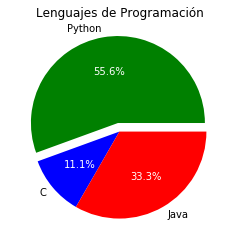

In [39]:
lenguajes = ("Python", "C", "Java")
valores = (100, 20, 60)
colores = ("green", "blue", "red")

valor = (0.1, 0, 0)

_, _, texto = pyplot.pie(valores, colors=colores, labels = lenguajes, autopct="%1.1f%%", explode = valor)
 
for tex in texto: # Para visualizar % en color blanco
    tex.set_color("white")

#pyplot.axis("equal")
pyplot.title("Lenguajes de Programación")
#pyplot.legend(labels = lenguajes) # Para ver la leyenda al lado del gráfico

#pyplot.show()
pyplot.savefig("graficaaa1.png")

#En mi caso para guardar la imagen sería:
plt.savefig("guardadaG1.png")



### Para seleccionar valores del comboBox

In [34]:
main_window = tk.Tk()

variableGlobal = ""

def selection_changed(event):
    global variableGlobal
    variableGlobal = combo.get()
    print("Elemento seleccionado:", variableGlobal)

def __init__(main_window):
    super().__init__(main_window)
    funcion()

def funcion():
    main_window.title("Combobox1")
 
    combo = ttk.Combobox()
    combo.place(x=50, y=50)
    combo["values"] = ["Python", "C", "C++", "Java"]
    combo.bind("<<ComboboxSelected>>", selection_changed)
    
    main_window.configure(width=300, height=200)
    place(width=300, height=200)

app = Application(main_window)
app.mainloop()

In [11]:
import tkinter as tk
from tkinter import ttk

tkwindow = tk.Tk()

cbox = ttk.Combobox(tkwindow, values=[1,2,3], state='readonly')
cbox.grid(column=0, row=0)


def callback(eventObject):
    print(eventObject)

cbox.bind("<<ComboboxSelected>>", callback)

tkwindow.mainloop()

<VirtualEvent event x=0 y=0>
<VirtualEvent event x=0 y=0>
<VirtualEvent event x=0 y=0>


In [35]:
import tkinter as tk
from tkinter import ttk

tkwindow = tk.Tk()

cbox = ttk.Combobox(tkwindow, values=[1,2,3], state='readonly')
cbox.grid(column=0, row=0)

cbox.bind("<<ComboboxSelected>>", lambda _ : print("Selected!"))

tkwindow.mainloop()

Selected!
Selected!


In [57]:
import tkinter as tk
from tkinter import ttk


tkwindow = tk.Tk()
c = ""

# This function will check the current value of cbox and then set
# that value to the global variable c.
def establecerValorSeleccionado(event):
    global c
    c = nombreCombo.get() # Se asigna en la variable c, el valor del combobox seleccionado
    print(c)


#def funcion():
nombreCombo = ttk.Combobox(tkwindow, values=['opcion1', 'opcion2', 'opcion3'], state='readonly') #Ya esta
nombreCombo.grid(column=0, row=0)  #Ya esta
# This bind calls the check_box() function when an item is selected.
nombreCombo.bind("<<ComboboxSelected>>", establecerValorSeleccionado)

#funcion()    
tkwindow.mainloop()